In [128]:
# Importing all the necessaries libraries

import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm

# New Section

In [129]:
# This is the function definition of the Exo-SIR Model that we designed

def Exo_SIR_model(y, t, beta_x, beta_e, gamma):
    s, i_x, i_e, r = y
    
    i = i_x+i_e
    ds__dt = -beta_x*s-beta_e*s*i
    dix__dt = beta_x*s-gamma*i_x
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i
    
    return([ds__dt, dix__dt, die__dt, dr__dt])

In [130]:
# This is the time series data which we're going to work on 

data1 = pd.read_csv('/content/Rajasthan_time_series.csv')
data1

,Date,DC,Recovered,Deceased,DR,TC,TR,Imported
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0
5,March19,2,0,0,0,9,3,2.0
6,March20,8,0,0,0,17,3,0.0
7,March21,7,0,0,0,24,3,0.0
8,March22,4,0,0,0,28,3,2.0
9,March23,4,0,0,0,32,3,0.0


In [131]:
# Renaming the columns

data1.columns = ['Date','DC','Rec','Death','DR','TC','TR','Imp_DC']
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC
0,March14,3,1,0,1,3,1,1.0
1,March15,1,2,0,2,4,3,0.0
2,March16,0,0,0,0,4,3,0.0
3,March17,0,0,0,0,4,3,0.0
4,March18,3,0,0,0,7,3,3.0


In [132]:
data1.Imp_DC

0      1.0
1      0.0
2      0.0
3      0.0
4      3.0
5      2.0
6      0.0
7      0.0
8      2.0
9      0.0
10     0.0
11     0.0
12     2.0
13     0.0
14     0.0
15     1.0
16     7.0
17    11.0
18     2.0
19     0.0
20     9.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
Name: Imp_DC, dtype: float64

In [133]:
# Computing the cumulative Imported infections an adding it as a column to the dataset

cum_imp_cases = [data1.loc[0,'Imp_DC']]
for it in range(1,len(data1)):
    cum_imp_cases.append(cum_imp_cases[it-1]+data1.Imp_DC[it])

data1['Imp_TC'] = cum_imp_cases
data1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC
0,March14,3,1,0,1,3,1,1.0,1.0
1,March15,1,2,0,2,4,3,0.0,1.0
2,March16,0,0,0,0,4,3,0.0,1.0
3,March17,0,0,0,0,4,3,0.0,1.0
4,March18,3,0,0,0,7,3,3.0,4.0
5,March19,2,0,0,0,9,3,2.0,6.0
6,March20,8,0,0,0,17,3,0.0,6.0
7,March21,7,0,0,0,24,3,0.0,6.0
8,March22,4,0,0,0,28,3,2.0,8.0
9,March23,4,0,0,0,32,3,0.0,8.0


In [134]:
# Calculating daywise S(susceptible number) adding it to the dataset

N = 77264000 # 7.72 Crores

Sus = N - data1.TC - data1.TR
data1['S'] = Sus
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S
0,March14,3,1,0,1,3,1,1.0,1.0,77263996
1,March15,1,2,0,2,4,3,0.0,1.0,77263993
2,March16,0,0,0,0,4,3,0.0,1.0,77263993
3,March17,0,0,0,0,4,3,0.0,1.0,77263993
4,March18,3,0,0,0,7,3,3.0,4.0,77263990


In [135]:
# Adding fraction of susceptible number(s=S/N) column to the data set

sus = data1.S/N
data1['s'] = sus
data1.head()

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0


In [136]:
# Subsetting the datframe to contain the range of dates required for analysis
data = data1[0:25]
data

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.000000
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.000000
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.000000
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.000000
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.000000
5,March19,2,0,0,0,9,3,2.0,6.0,77263988,1.000000
6,March20,8,0,0,0,17,3,0.0,6.0,77263980,1.000000
7,March21,7,0,0,0,24,3,0.0,6.0,77263973,1.000000
8,March22,4,0,0,0,28,3,2.0,8.0,77263969,1.000000
9,March23,4,0,0,0,32,3,0.0,8.0,77263965,1.000000


In [137]:
# Finding the fraction of infections on day to the sum of infections on all days under study

daywise_fractions = []
for inf in data.DC:
    daywise_fractions.append(inf/sum(data.DC))
daywise_fractions

[0.008746355685131196,
 0.0029154518950437317,
 0.0,
 0.0,
 0.008746355685131196,
 0.0058309037900874635,
 0.023323615160349854,
 0.02040816326530612,
 0.011661807580174927,
 0.011661807580174927,
 0.0,
 0.01749271137026239,
 0.0058309037900874635,
 0.029154518950437316,
 0.011661807580174927,
 0.014577259475218658,
 0.05830903790087463,
 0.04081632653061224,
 0.07871720116618076,
 0.037900874635568516,
 0.13411078717201166,
 0.07871720116618076,
 0.1749271137026239,
 0.10204081632653061,
 0.12244897959183673]

In [138]:
# Finding the probable day-wise distribution of total number of infections due to Tablighi Jamaat, using the fractions computed earlier 
# Assumption made is that number of infections due to the Tablighi event, are also distributed in the same trend and are contained
# in the number of daily infections already present in the dataset

I_X_Raj = 43
daywise_cases = []
for i in daywise_fractions:
    daywise_cases.append(I_X_Raj*i)
daywise_cases

[0.37609329446064144,
 0.12536443148688045,
 0.0,
 0.0,
 0.37609329446064144,
 0.2507288629737609,
 1.0029154518950436,
 0.8775510204081632,
 0.5014577259475218,
 0.5014577259475218,
 0.0,
 0.7521865889212829,
 0.2507288629737609,
 1.2536443148688046,
 0.5014577259475218,
 0.6268221574344023,
 2.507288629737609,
 1.7551020408163265,
 3.3848396501457727,
 1.6297376093294462,
 5.766763848396502,
 3.3848396501457727,
 7.521865889212828,
 4.387755102040816,
 5.26530612244898]

In [139]:
# The variable daywise_cases stores the distribution of infections caused due to Tablighi event in a daywise manner
# Checking if their sum is accurately adding up to the number contained in I_X_Raj and if that is lesser than total number 
# of infections contained in the dataset till the date of study

print(sum(daywise_cases))
print(sum(data.DC))

43.0
343


In [140]:
# Adding the daily distribution of infections due to the Tablighi Jamaat which was just found, as a column to the dataframe

data['TB_DC'] = daywise_cases
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0,0.376093
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0,0.125364
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0,0.376093


In [141]:
# Computing the cumulative values of infections due to Tablighi Jamaat using the daily distribution that was just created

cum_tb_cases = [data.loc[0,'TB_DC']]
for it in range(1,25):
    cum_tb_cases.append(cum_tb_cases[it-1]+data.TB_DC[it])
cum_tb_cases

[0.37609329446064144,
 0.5014577259475219,
 0.5014577259475219,
 0.5014577259475219,
 0.8775510204081634,
 1.1282798833819243,
 2.131195335276968,
 3.008746355685131,
 3.510204081632653,
 4.011661807580174,
 4.011661807580174,
 4.763848396501457,
 5.014577259475217,
 6.268221574344022,
 6.769679300291544,
 7.396501457725946,
 9.903790087463555,
 11.658892128279883,
 15.043731778425656,
 16.6734693877551,
 22.440233236151602,
 25.825072886297374,
 33.3469387755102,
 37.73469387755102,
 43.0]

In [142]:
# Adding the cumulative infections as a column to the dataset

data['TB_TC'] = cum_tb_cases
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.0,0.376093,0.376093
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.0,0.125364,0.501458
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000,0.501458
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.0,0.000000,0.501458
4,March18,3,0,0,0,7,3,3.0,4.0,77263990,1.0,0.376093,0.877551


In [143]:
data.Imp_TC[4:22]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)


In [144]:
# Adding I_X (number of exogenous infections), I_E(number of endogenous infections), i_x(fraction of I_X), i_e(fraction of I_E) 
# as columns to the dataset
# All the values being calculated are cumulative
# I_X = Imported infections + infections due to Tablighi Jamaat
# Total infections = I_X + I_E

I_X = data.Imp_TC + data.TB_TC
data['I_X'] = I_X
I_E = data.TC - data.I_X
data['I_E'] = I_E

i_x = I_X/N
i_e = I_E/N
data['i_x'] = i_x
data['i_e'] = i_e

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,s,TB_DC,TB_TC,I_X,I_E,i_x,i_e
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,1.000000,0.376093,0.376093,1.376093,1.623907,1.781028e-08,2.101764e-08
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,1.000000,0.125364,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,1.000000,0.000000,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,1.000000,0.000000,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08
4,March18,3,0,0,0,7,3,3.0,0.0,77263990,1.000000,0.376093,0.877551,0.877551,6.122449,1.135783e-08,7.924064e-08
5,March19,2,0,0,0,9,3,2.0,0.0,77263988,1.000000,0.250729,1.128280,1.128280,7.871720,1.460292e-08,1.018808e-07
6,March20,8,0,0,0,17,3,0.0,0.0,77263980,1.000000,1.002915,2.131195,2.131195,14.868805,2.758329e-08,1.924416e-07
7,March21,7,0,0,0,24,3,0.0,0.0,77263973,1.000000,0.877551,3.008746,3.008746,20.991254,3.894112e-08,2.716822e-07
8,March22,4,0,0,0,28,3,2.0,0.0,77263969,1.000000,0.501458,3.510204,3.510204,24.489796,4.543130e-08,3.169626e-07
9,March23,4,0,0,0,32,3,0.0,0.0,77263965,1.000000,0.501458,4.011662,4.011662,27.988338,5.192149e-08,3.622429e-07


In [145]:
# Adding i(fraction of cumulative infections), r(fraction of cumulative recoveries), di/dt(fraction of difference in cumulative infections i.e daily infections) 
# and dr/dt(similarly...fraction of daily recoveries) columns to the dataset
# as Number of cumulative values on nth day - Number of cumulative values on (n-1)th day = Number of new daily values on nth day


i = data.TC/N
data['i'] = i
r = data.TR/N
data['r'] = r

di_dt = data.DC/N
data['di_dt'] = di_dt
dr_dt = data.DR/N
data['dr_dt'] = dr_dt

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,TB_DC,TB_TC,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,0.376093,0.376093,1.376093,1.623907,1.781028e-08,2.101764e-08,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,0.125364,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,0.000000,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,0.000000,0.501458,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00
4,March18,3,0,0,0,7,3,3.0,0.0,77263990,...,0.376093,0.877551,0.877551,6.122449,1.135783e-08,7.924064e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00


In [146]:
# Adding the dix/dt(fraction of daily exogenous infections) and die/dt(fraction of daily endogenous infections) columns to the dataset

dix_dt = [0]
die_dt = [0]

for i in range(1,25):
    temp1 = data.i_x[i]-data.i_x[i-1]
    temp2 = data.i_e[i]-data.i_e[i-1]
    
    if temp1>0:
        dix_dt.append(temp1)
    else:
        dix_dt.append(-1*temp1)
        
    if temp2>0:
        die_dt.append(temp2)
    else:
        die_dt.append(-1*temp2)
        
print(len(dix_dt))
print(len(die_dt))

data['dix_dt'] = dix_dt
data['die_dt'] = die_dt
data.head()

25
25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,1.376093,1.623907,1.781028e-08,2.101764e-08,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08,0.000000e+00,0.000000e+00
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08,1.622546e-09,1.132009e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,March18,3,0,0,0,7,3,3.0,0.0,77263990,...,0.877551,6.122449,1.135783e-08,7.924064e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00,8.074999e-09,4.690291e-08


In [147]:
df1 = data
df1

,Date,DC,Rec,Death,DR,TC,TR,Imp_DC,Imp_TC,S,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,March14,3,1,0,1,3,1,1.0,1.0,77263996,...,1.376093,1.623907,1.781028e-08,2.101764e-08,3.882791e-08,1.294264e-08,3.882791e-08,1.294264e-08,0.000000e+00,0.000000e+00
1,March15,1,2,0,2,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,1.294264e-08,2.588528e-08,1.622546e-09,1.132009e-08
2,March16,0,0,0,0,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
3,March17,0,0,0,0,4,3,0.0,1.0,77263993,...,1.501458,2.498542,1.943282e-08,3.233773e-08,5.177055e-08,3.882791e-08,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
4,March18,3,0,0,0,7,3,3.0,0.0,77263990,...,0.877551,6.122449,1.135783e-08,7.924064e-08,9.059847e-08,3.882791e-08,3.882791e-08,0.000000e+00,8.074999e-09,4.690291e-08
5,March19,2,0,0,0,9,3,2.0,0.0,77263988,...,1.128280,7.871720,1.460292e-08,1.018808e-07,1.164837e-07,3.882791e-08,2.588528e-08,0.000000e+00,3.245093e-09,2.264018e-08
6,March20,8,0,0,0,17,3,0.0,0.0,77263980,...,2.131195,14.868805,2.758329e-08,1.924416e-07,2.200248e-07,3.882791e-08,1.035411e-07,0.000000e+00,1.298037e-08,9.056073e-08
7,March21,7,0,0,0,24,3,0.0,0.0,77263973,...,3.008746,20.991254,3.894112e-08,2.716822e-07,3.106233e-07,3.882791e-08,9.059847e-08,0.000000e+00,1.135783e-08,7.924064e-08
8,March22,4,0,0,0,28,3,2.0,0.0,77263969,...,3.510204,24.489796,4.543130e-08,3.169626e-07,3.623939e-07,3.882791e-08,5.177055e-08,0.000000e+00,6.490186e-09,4.528037e-08
9,March23,4,0,0,0,32,3,0.0,0.0,77263965,...,4.011662,27.988338,5.192149e-08,3.622429e-07,4.141644e-07,3.882791e-08,5.177055e-08,0.000000e+00,6.490186e-09,4.528037e-08


In [148]:
# Calculating day-wise Gamma for the set of days

Gamma = df1.dr_dt / df1.i
print('daywise gamma for Rajasthan\n')
Gamma

daywise gamma for Rajasthan



0     0.333333
1     0.500000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.111650
22    0.000000
23    0.003322
24    0.000000
dtype: float64

In [149]:
# Calculating day-wise Beta_x for the set of days

Beta_x = (df1.dix_dt+Gamma*df1.i_x) / df1.s
print('daywise beta_x for Rajasthan')
Beta_x

daywise beta_x for Rajasthan


0     5.936760e-09
1     1.133896e-08
2     0.000000e+00
3     0.000000e+00
4     8.075000e-09
5     3.245093e-09
6     1.298038e-08
7     1.135783e-08
8     6.490189e-09
9     6.490189e-09
10    0.000000e+00
11    9.735284e-09
12    3.245095e-09
13    1.622548e-08
14    6.490191e-09
15    8.112739e-09
16    3.245096e-08
17    2.271568e-08
18    4.380882e-08
19    2.109314e-08
20    7.463731e-08
21    8.112757e-08
22    6.150606e-07
23    6.013188e-08
24    6.814728e-08
dtype: float64

In [150]:
# Calculating day-wise Beta_e for the set of days

Beta_e = (df1.die_dt+Gamma*df1.i_e)/(df1.s*df1.i)    
print('daywise beta_e for Rajasthan')
Beta_e

daywise beta_e for Rajasthan


0     0.180434
1     0.530977
2     0.000000
3     0.000000
4     0.517701
5     0.194363
6     0.411593
7     0.255102
8     0.124948
9     0.109329
10    0.000000
11    0.138100
12    0.043732
13    0.174927
14    0.064788
15    0.074122
16    0.221427
17    0.131666
18    0.196793
19    0.085491
20    0.224767
21    0.212291
22    0.046910
23    0.104167
24    0.107099
dtype: float64

In [151]:
# Calculating mean of Beta_x, Beta_e and Gamma for Rajasthan
 
beta_x_mean = st.mean(Beta_x)
beta_e_mean = st.mean(Beta_e)
gamma_mean = st.mean(Gamma)
print("the mean of Beta_x for Rajasthan \n",beta_x_mean)
print("the mean of Beta_e for Rajasthan \n",beta_e_mean)
print("the mean of Gamma for Rajasthan using actual cases\n",gamma_mean)

the mean of Beta_x for Rajasthan 
 4.5155858870587026e-08
the mean of Beta_e for Rajasthan 
 0.16602911679441223
the mean of Gamma for Rajasthan using actual cases
 0.03793224311625757


# Plotting the predictions

In [152]:
# Solving the ODEs using Scipy
# Assigning initial values of infections, recoveries & susceptibles along with the three parameters beta_x, beta_e and gamma
# all which are input to the Exo_SIR funtion

S0 = df1.loc[24,'s']
IX0 = df1.loc[24,'i_x']
IE0 = df1.loc[24,'i_e']
R0 = df1.loc[24,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean

# time vector
t = np.linspace(0, 500, 500)


# Result
solution1 = scipy.integrate.odeint(Exo_SIR_model,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)

0.9999952112238558
1.0742389728722302e-06
3.3650859391178296e-06
3.4945123213915927e-07


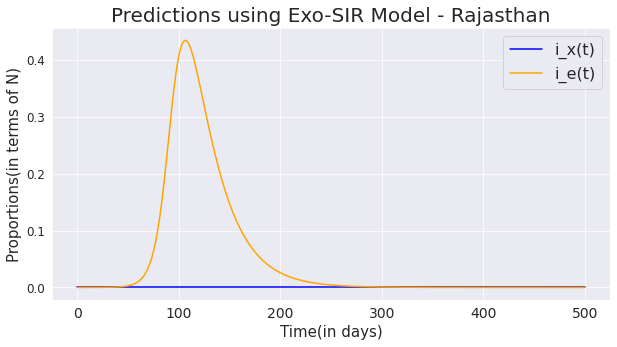

In [153]:
# Plotting the result

plt.figure(figsize = (10,5))
#plt.plot(t, solution1[:,0], label = 's(t)', c='red')
plt.plot(t, solution1[:,1], label = 'i_x(t)', c = 'blue')
plt.plot(t, solution1[:,2], label = 'i_e(t)', c ='orange')
#plt.plot(t, solution1[:,3], label = 'r(t)', c='green')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Rajasthan", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
plt.savefig('E:\\Docs & Files\\SMA\\4. Exo-SIR Model\\pred_Exo-SIR_Raj_with_i_x.png')
plt.show()

## With i_x

In [154]:
# Finding the value of the peak which is seen in the plot above

max(solution1[:,2])

0.43422432149153517

In [155]:
# Finding the exact time slice(day on x-axis) when the peak occurs

# list_r = list(solution1[:,2])
# list_r.index(0.3487077427729564)